In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets, models

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

reshape y if needed:

y_train = y_train.reshape(-1,)

In [24]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(X, y, index):
    plt.figure(figsize=(5, 1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])
    plt.show()

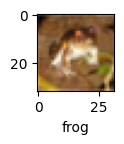

In [25]:
plot_sample(X_train, y_train, 0)

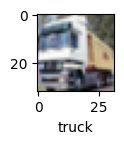

In [26]:
plot_sample(X_train, y_train, 1)

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3023 - loss: 1.9296
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4187 - loss: 1.6490
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4495 - loss: 1.5580
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4754 - loss: 1.4889
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4973 - loss: 1.4333


In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4511 - loss: 1.5444


[1.5506877899169922, 0.45179998874664307]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
yp = model.predict(X_test)
y_pred = [np.argmax(elem) for elem in yp]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      1000
           1       0.79      0.33      0.47      1000
           2       0.33      0.33      0.33      1000
           3       0.31      0.48      0.37      1000
           4       0.30      0.60      0.40      1000
           5       0.51      0.19      0.28      1000
           6       0.48      0.60      0.54      1000
           7       0.55      0.46      0.50      1000
           8       0.65      0.55      0.60      1000
           9       0.54      0.59      0.57      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [35]:
model_cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3862 - loss: 1.6957
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5818 - loss: 1.1856
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6464 - loss: 1.0188
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6775 - loss: 0.9288
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7113 - loss: 0.8475
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7247 - loss: 0.7995
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7379 - loss: 0.7546
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7537 - loss: 0.7086
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7698 - loss: 0.6687
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7818 - loss: 0.6247


In [36]:
model_cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6962 - loss: 0.9231


[0.9321615695953369, 0.6912999749183655]

In [37]:
yp = model_cnn.predict(X_test)
y_pred = [np.argmax(elem) for elem in yp]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1000
           1       0.86      0.75      0.80      1000
           2       0.58      0.60      0.59      1000
           3       0.57      0.48      0.52      1000
           4       0.68      0.56      0.61      1000
           5       0.70      0.52      0.59      1000
           6       0.78      0.77      0.77      1000
           7       0.64      0.81      0.72      1000
           8       0.77      0.84      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

